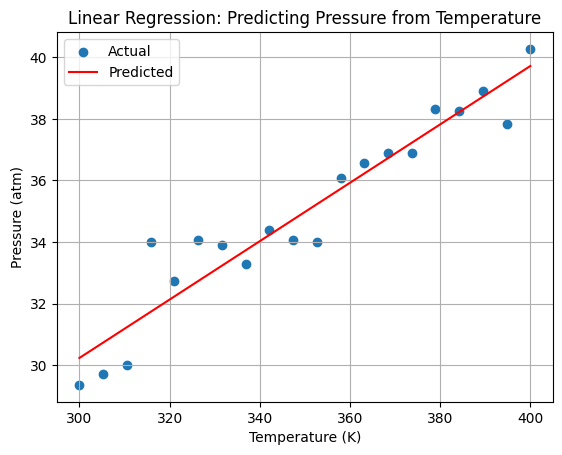

Slope (k): 0.095
Intercept (b): 1.778


In [ ]:
# Week 4 goal Supervised Learning
# Regression - Predict numerical values ( temperature, yield, pressure)
# Classification - Predict cotegories (pass/fail, high/low, toxic/non-toxic)\

# Day 1: Introduction to Supervised Learning
# You have input features(like temperature, pressure) and output labels (like pass/fail).
# The model learns to map input -> output by minimizing error 
# In easy terms, it learns to predict the output based on the input data.

# Synthetic Dataset 
import numpy as np # For handling arrays and numerical operations
import pandas as pd # For data manipulation and analysis
from sklearn.linear_model import LinearRegression # For creating and using linear regression models
import matplotlib.pyplot as plt # For plotting graphs

# Simulate ideal gas data: P = nRT/V
T = np.linspace(300, 400, 20).reshape(-1,1) # This means 20 temperature values from 300 to 400 reshape (-1,1) means 20 rows and 1 column (reshape is used to change the shape of the array like a matrix)

# k is a constant, where k = nR/V
# Here we assume nR/V = 0.1 for simplicity
P = 0.1 * T + np.random.normal(0, 1, T.shape) # This means pressure is proportional to temperature with some noise (noise are random values added to make it more realistic) 

# Train model 
model = LinearRegression()
model.fit(T, P)

# Predict values
P_pred = model.predict(T)

# Plot results
plt.scatter(T, P, label='Actual')
plt.plot(T, P_pred, color='red', label='Predicted')
plt.xlabel("Temperature (K)")
plt.ylabel("Pressure (atm)")
plt.title("Linear Regression: Predicting Pressure from Temperature")
plt.legend()
plt.grid(True)
plt.show()

# Coefficients 
print(f"Slope (k): {model.coef_[0][0]:.3f}")
print(f"Intercept (b): {model.intercept_[0]:.3f}")

# Output (a line of best fit and the equation of the line are P = kT + b)

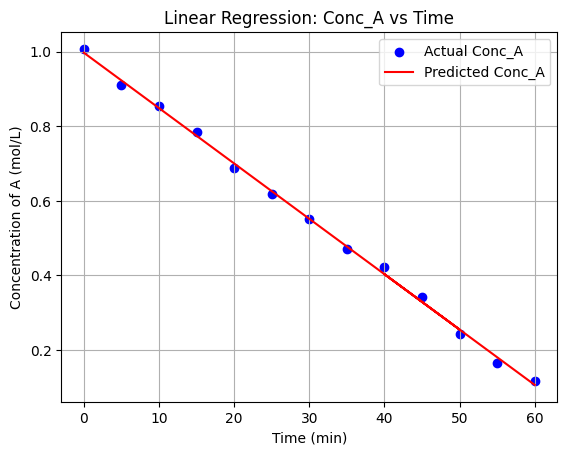

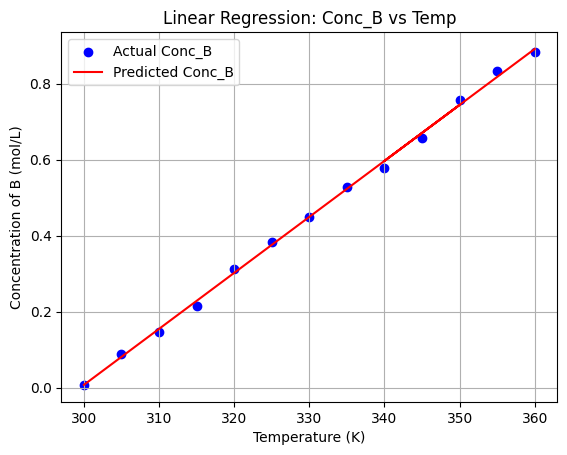

Equation: Conc_A = -0.015 * Time + 0.997
Slope (k): -0.015
Intercept (b): 0.997
Equation: Conc_B = 0.015 * Temp + -4.416
Slope (k): 0.015
Intercept (b): -4.416


In [ ]:
# Week 4 Day 2: Regression with Real Data (UNORGANIZED CODE) 

import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 

# Load CSV / dataset
data = pd.read_csv('reactor_data_sample.csv')

# Cleaned the data
data_C = data.dropna()

# For Conc_A VS Time(min)
# Reshape time (X) and Conc_A (y) for regression
X_A = data_C[["Time(min)"]].values.reshape(-1,1) # Ensure X is a 2D array 
y_A = data_C[["Conc_A(mol/L)"]]

# For Conc_B VS Temp(K)
X_B = data_C[["Temp(K)"]].values.reshape(-1,1)
y_B = data_C[["Conc_B(mol/L)"]]

# Train the model
model_A = LinearRegression()
model_A.fit(X_A, y_A)

model_B = LinearRegression()
model_B.fit(X_B, y_B)

# Predict values 
y_Apredict = model_A.predict(X_A)
y_Bpredict = model_B.predict(X_B)

# Plot results 
plt.scatter(X_A, y_A, label='Actual Conc_A', color='blue')
plt.plot(X_A, y_Apredict, label='Predicted Conc_A', color='red')
plt.xlabel("Time (min)")
plt.ylabel("Concentration of A (mol/L)")
plt.title("Linear Regression: Conc_A vs Time")
plt.legend()
plt.grid(True)
plt.show()

plt.scatter(X_B, y_B, label='Actual Conc_B', color='blue')
plt.plot(X_B, y_Bpredict, label='Predicted Conc_B', color='red')
plt.xlabel("Temperature (K)")
plt.ylabel("Concentration of B (mol/L)")
plt.title("Linear Regression: Conc_B vs Temp")
plt.legend()
plt.grid(True)
plt.show()

# Print coefficients
print(f"Equation: Conc_A = {model_A.coef_[0][0]:.3f} * Time + {model_A.intercept_[0]:.3f}") # y = m*x + b format
print(f"Slope (k): {model_A.coef_[0][0]:.3f}") # 2D array so we use [0][0] to get the value
print(f"Intercept (b): {model_A.intercept_[0]:.3f}") 

print(f"Equation: Conc_B = {model_B.coef_[0][0]:.3f} * Temp + {model_B.intercept_[0]:.3f}")
print(f"Slope (k): {model_B.coef_[0][0]:.3f}")
print(f"Intercept (b): {model_B.intercept_[0]:.3f}")


 

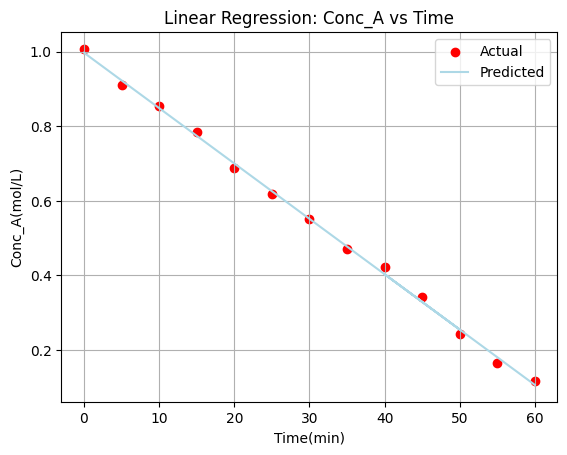

Equation: Conc_A(mol/L) = -0.015 * Time(min) + 0.997
SLope(k): -0.015
y-intercept(b): 0.997

 Evaluation Metrics: Linear Regression: Conc_A vs Time
MAE: 0.010
MSE: 0.000
R2: 0.998
RMSE: 0.011


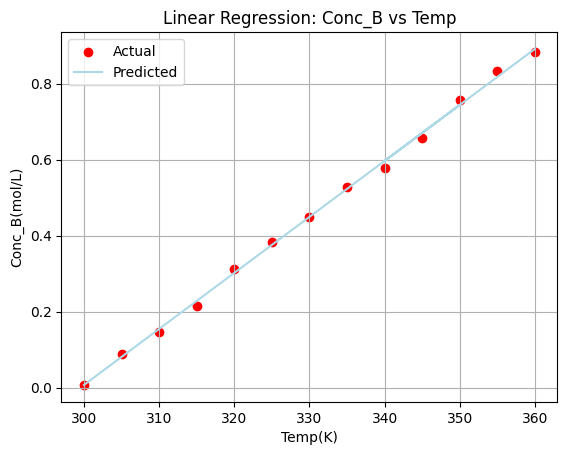

Equation: Conc_B(mol/L) = 0.015 * Temp(K) + -4.416
SLope(k): 0.015
y-intercept(b): -4.416

 Evaluation Metrics: Linear Regression: Conc_B vs Temp
MAE: 0.009
MSE: 0.000
R2: 0.998
RMSE: 0.011


In [ ]:
# ORGANIZED CODE + Day 3 (Week 4)

import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load CSV and cleaned
data = pd.read_csv('reactor_data_sample.csv').dropna()

# function linear regression and plot 
def run_regression(X_col, y_col, x_label, y_label, title):
    # model 
    X = data[[X_col]].values
    y = data[[y_col]].values

    model = LinearRegression()
    model.fit(X, y)

    # predict
    y_predict = model.predict(X)

    # plot the result 
    plt.scatter(X, y, label='Actual', color='red')
    plt.plot(X, y_predict, label ='Predicted', color='lightblue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

    # print equation, slope and its y-intercept
    print(f'Equation: {y_col} = {model.coef_[0][0]:.3f} * {X_col} + {model.intercept_[0]:.3f}')
    print(f'SLope(k): {model.coef_[0][0]:.3f}')
    print(f'y-intercept(b): {model.intercept_[0]:.3f}')

    # Evaluation metrics
    mae = mean_absolute_error(y, y_predict)
    mse = mean_squared_error(y, y_predict)
    r2 = r2_score(y, y_predict)
    rmse = np.sqrt(mse)

    print(f'\n Evaluation Metrics: {title}')
    print(f'MAE: {mae:.3f}')
    print(f'MSE: {mse:.3f}')
    print(f'R2: {r2:.3f}')
    print(f'RMSE: {rmse:.3f}')
    return model

# run linear regression for Conc_A vs Time 
model_A = run_regression('Time(min)', 'Conc_A(mol/L)', 'Time(min)', 'Conc_A(mol/L)', 'Linear Regression: Conc_A vs Time')

model_B = run_regression('Temp(K)', 'Conc_B(mol/L)', 'Temp(K)', 'Conc_B(mol/L)', 'Linear Regression: Conc_B vs Temp')

# In this case, y_col is actual values and y_predict is predicted values
# MAE = 0.010 mol/L 
# MSE = 0 mol/L so the model is perfect
# R2 = 0.998 so the model is perfect if 0 then the model is not perfect
# RMSE = 0.011 mol/L rmse is the square root of mse meaning smaller is better 


[[1 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



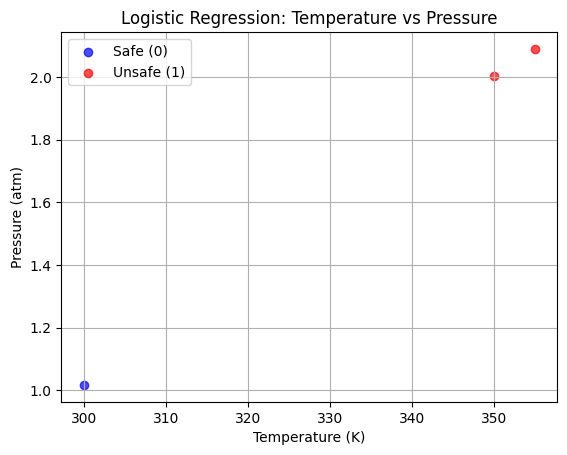

In [ ]:
# Week 4 - Day 4: Classification with Logical Regression 
# For not numbers
# models probability: P(y = 1 | x) = 1 / (1 + exp(-m'x + b))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load data 
data = pd.read_csv('reactor_data_sample.csv')

# Create binary target: 1 is unsafe, 0 is safe
# np.where(condition, value_if_true, value_if_false)
labels = np.where((data["Temp(K)"] > 330) | (data["Pressure(atm)"] > 1.595), 1, 0)

# Create DataFrame
df = pd.DataFrame({
    "Temp(K)": data["Temp(K)"],
    "Pressure(atm)": data["Pressure(atm)"],
    "Status": labels
})

# Train/test split
# Train test split is a machine learning model validation process that allows you to simulate how your model would perform with new data.
X = df[["Temp(K)", "Pressure(atm)"]]
y = df["Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression 
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot 
# plt.scatter(X_test["Temp(K)"], X_test["Pressure(atm)"], c=y_test, cmap="bwr", alpha=0.7)
# Plot points manually by class to add labels
safe_mask = y_pred == 0
unsafe_mask = y_pred == 1

plt.scatter(X_test["Temp(K)"][safe_mask], X_test["Pressure(atm)"][safe_mask],
            color='blue', label='Safe (0)', alpha=0.7)

plt.scatter(X_test["Temp(K)"][unsafe_mask], X_test["Pressure(atm)"][unsafe_mask],
            color='red', label='Unsafe (1)', alpha=0.7)
plt.xlabel("Temperature (K)")
plt.ylabel("Pressure (atm)")
plt.title("Logistic Regression: Temperature vs Pressure")
plt.grid(True)
plt.legend()
plt.show()

[[4 0 0]
 [0 5 0]
 [0 0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



c:\Users\KHAIRULAMIRIN\Desktop\Coding\ML (AI)\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


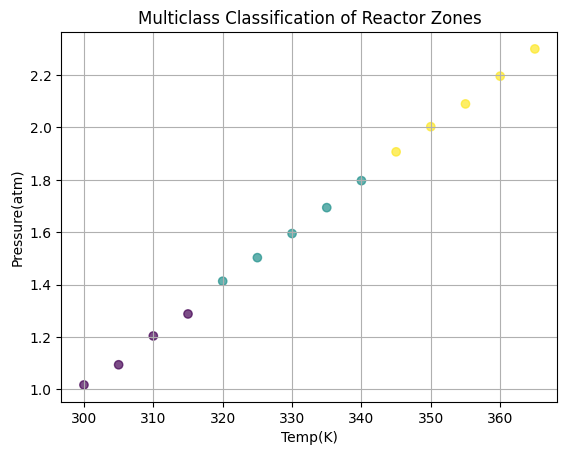

In [ ]:
#Week 4 - Day 5: Multiclass Classification 
# More than 2 classes
# Data scatter using all the data points no train or test (for studying only)

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# load Data 
data = pd.read_csv('reactor_data_sample.csv').dropna()

# Crate labels (3 classes)
def label_zone(t, p):
    if t < 320 and p < 1.413:
        return 0 # Safe
    elif t < 345 and p < 1.907:
        return 1 # Warning
    else:
        return 2 # Danger

# “For every (Temp, Pressure) pair in the dataset, call label_zone() and store the results in a NumPy array called labels.”
labels = np.array([label_zone(t, p) for t, p in zip(data["Temp(K)"], data["Pressure(atm)"])])

# DataFrame
df = pd.DataFrame({
    "Temp(K)": data["Temp(K)"],
    "Pressure(atm)": data["Pressure(atm)"],
    "Zone": labels
})

# Split data
X = df[["Temp(K)", "Pressure(atm)"]]
y = df["Zone"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train multiclass logistic regression 
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X, y)

# Evaluate
y_pred = model.predict(X)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

# plot predict
plt.scatter(X["Temp(K)"], X["Pressure(atm)"], c=y_pred, cmap='viridis', alpha=0.7)
plt.xlabel("Temp(K)")
plt.ylabel("Pressure(atm)")
plt.title("Multiclass Classification of Reactor Zones")
plt.grid(True)
plt.show()
